# Model

\begin{align}
\dfrac{dC}{dt}&= p - dC - \left(\dfrac{a_SCS}{1+a_Sh_SC+a_Sh_SF}\right) - \left(\dfrac{a_TCT}{1+a_Th_TC+a_Th_TO}\right) \\
\dfrac{dF}{dt}&= r_FF\left(1-\dfrac{F}{K_F}\right) - \left(\dfrac{a_SFS}{1+a_Sh_SC+a_Sh_SF}\right) \\
\dfrac{dT}{dt}&= \left(\dfrac{a_T(S)CT + a_TOT}{1+a_T(S)h_TC+a_Th_TO}\right) - m_TT - q_TT^2 \\
\dfrac{dS}{dt}&= \left(\dfrac{a_S(T)CS + a_SFS}{1+a_S(T)h_SC+a_Sh_SF}\right) - m_SS - q_SS^2
\end{align}

with $a_T(S)$ and $a_S(T)$ either

\begin{align*}
a_T(S)=\lambda_T\exp{(-\alpha S)} \\
a_S(T)=\lambda_S\exp{(-\beta T)}
\end{align*}

or

\begin{align*}
a_T(S)=a_T \\
a_S(T)=a_S
\end{align*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp  # to solve ODE system
from SALib.sample.morris import sample as ee_sample
from tqdm import tqdm

from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('onedork') #grade3

In [2]:
seed = 1234
step = 4000
time_list = np.linspace(0, 200, step)
num_of_points = 1000
method = "LSODA"

# Exponential Density-Mediated Interaction

## Parameter values

In [3]:
lambda_T=0.1
lambda_S=0.01
alpha=1
beta=100
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 10, 5, 15])

In [4]:
def model_exponential_density_mediated(
    t,
    X,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = lambda_T * np.exp( - alpha * S )
    aST = lambda_S * np.exp ( - beta * T )
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(lambda_T,lambda_S,alpha,beta,p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [5]:
solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,lambda_T=lambda_T, lambda_S=lambda_S, alpha=alpha, beta=beta, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_exponential_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


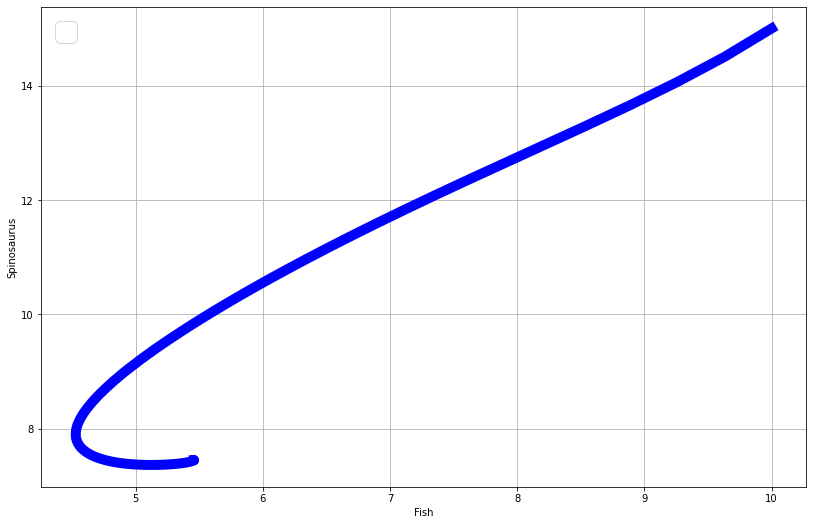

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


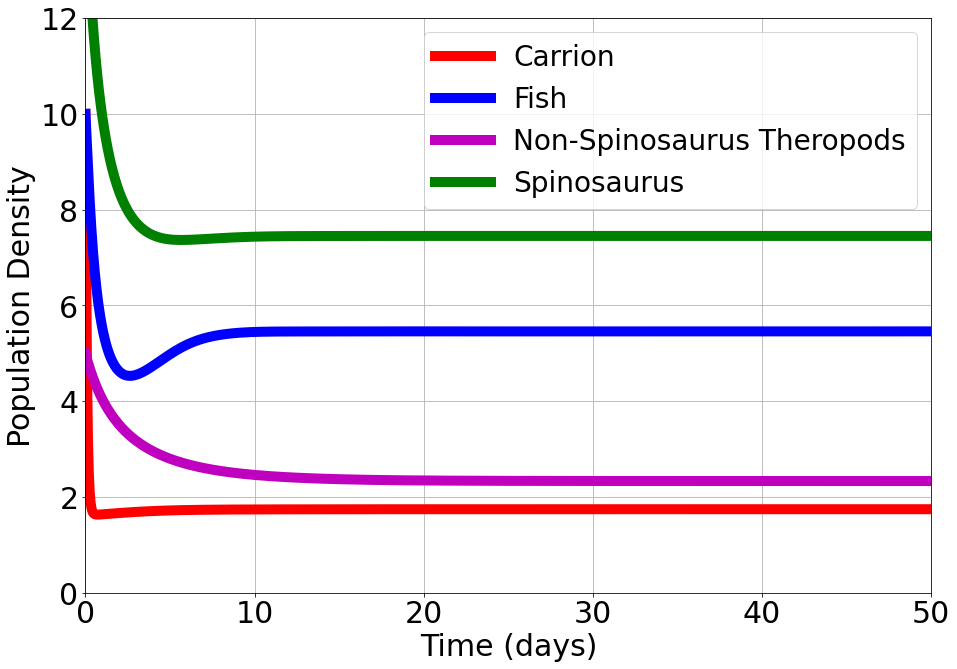

In [7]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50]) #time_list[-1]
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/exponential_density_mediated_evolution.eps', format='eps')
plt.tight_layout()
plt.show()

# No density-mediated interaction

## Parameter values

In [8]:
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 10, 5, 15])

In [9]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [10]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_No_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


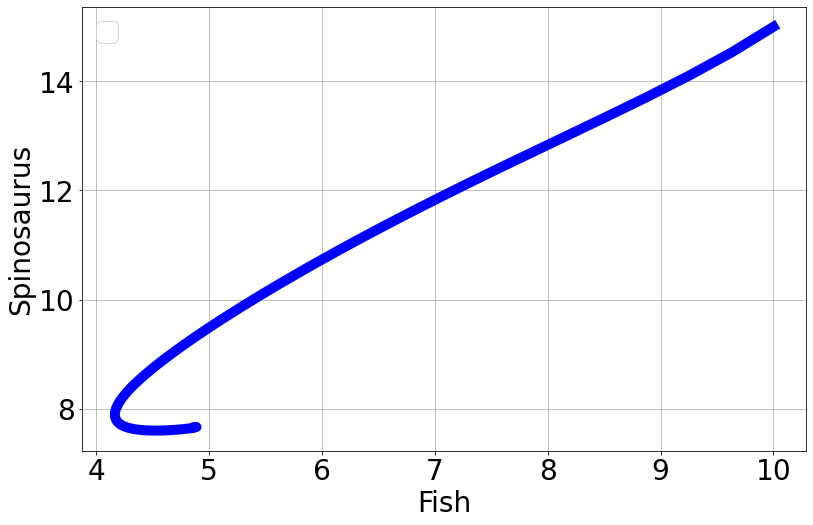

In [11]:
plt.rcParams['lines.linewidth'] = 30
plt.rcParams.update({'font.size': 28})

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


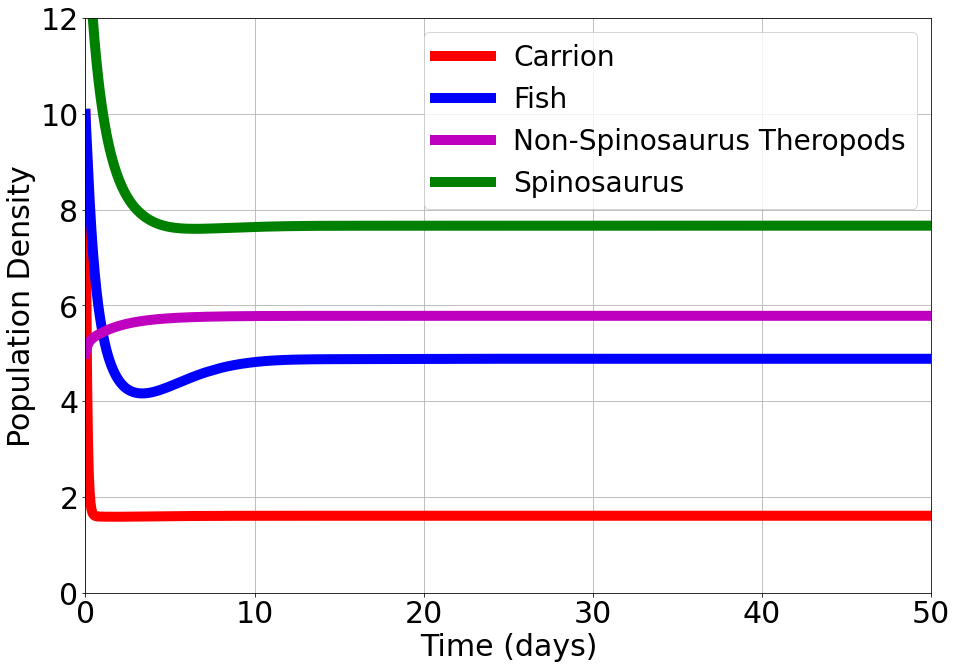

In [12]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50]) #time_list[-1]
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/No_density_mediated_evolution.eps', format='eps')
plt.tight_layout()
plt.show()

# Absence of Sauropods and others 

## Exponential Density-Mediated Interaction

## Parameter values

In [13]:
lambda_T=0.1
lambda_S=0.01
alpha=1
beta=100
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 10, 5, 15])

In [14]:
def model_exponential_density_mediated(
    t,
    X,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = lambda_T * np.exp( - alpha * S )
    aST = lambda_S * np.exp ( - beta * T )
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(lambda_T,lambda_S,alpha,beta,p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [15]:
solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,lambda_T=lambda_T, lambda_S=lambda_S, alpha=alpha, beta=beta, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_exponential_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


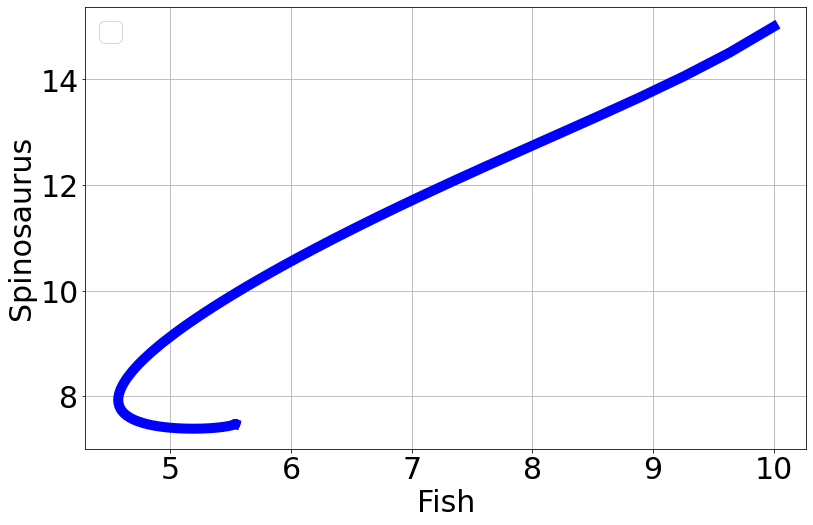

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


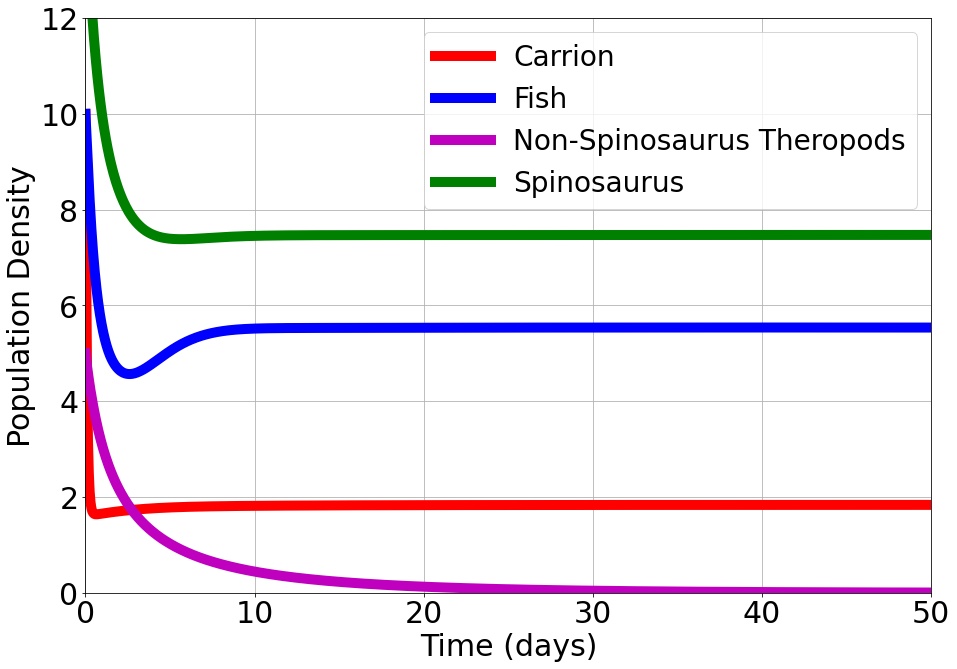

In [17]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50]) #time_list[-1]
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/exponential_density_mediated_evolution_free_O.eps', format='eps')
plt.tight_layout()
plt.show()

## No density-mediated interaction

In [18]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [19]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_No_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


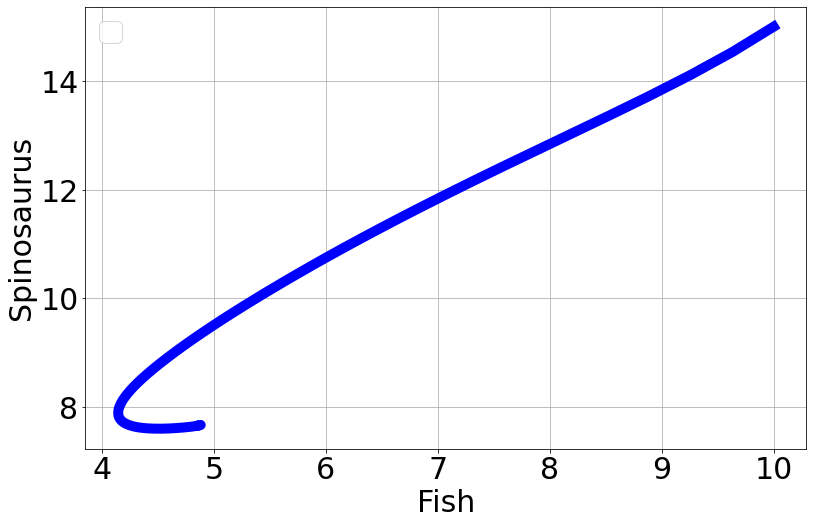

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


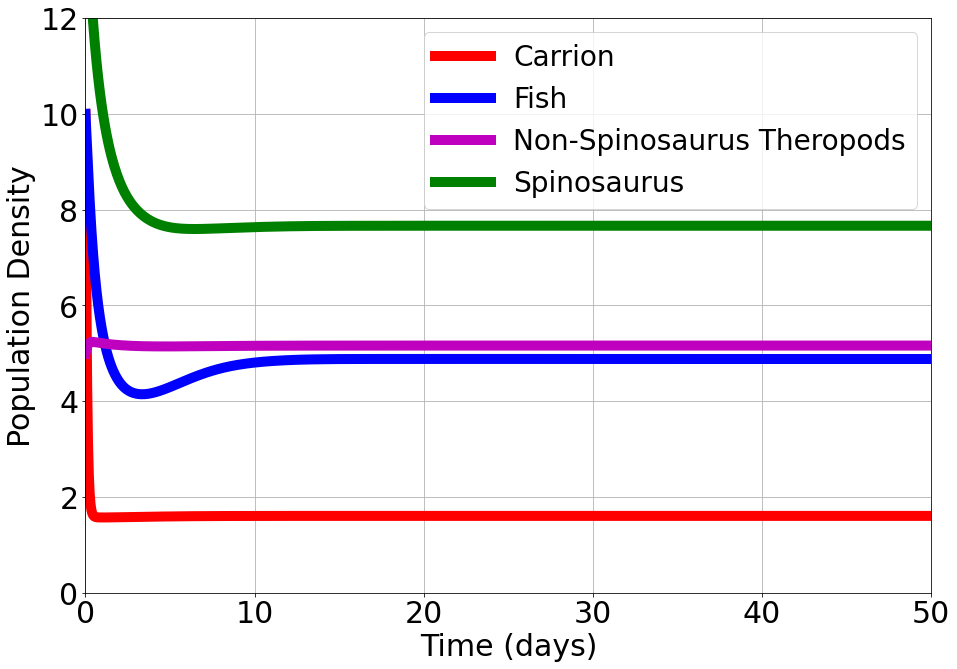

In [21]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50]) #time_list[-1]
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/No_density_mediated_evolution_free_O.eps', format='eps')
plt.tight_layout()
plt.show()

# Absence of Fishes

## Exponential Density-Mediated Interaction

## Parameter values

In [22]:
lambda_T=0.1
lambda_S=0.01
alpha=1
beta=100
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 0, 5, 15])

In [23]:
def model_exponential_density_mediated(
    t,
    X,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = lambda_T * np.exp( - alpha * S )
    aST = lambda_S * np.exp ( - beta * T )
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = 0#r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(lambda_T,lambda_S,alpha,beta,p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [24]:
solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,lambda_T=lambda_T, lambda_S=lambda_S, alpha=alpha, beta=beta, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_exponential_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


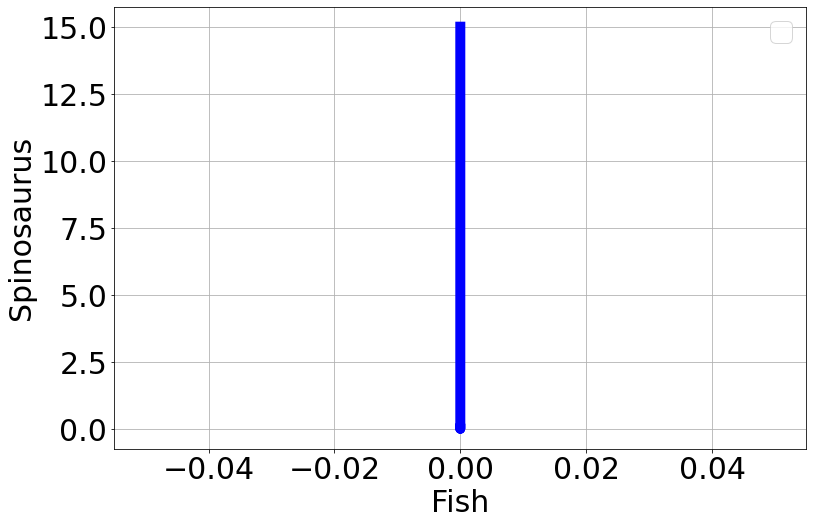

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


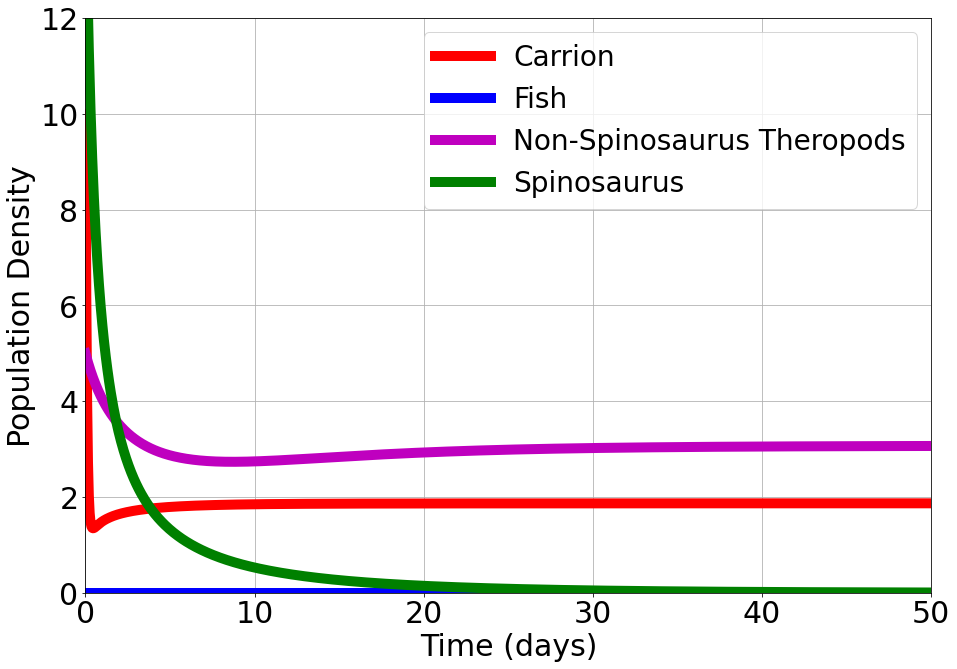

In [26]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50]) #time_list[-1]
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/exponential_density_mediated_evolution_free_F.eps', format='eps')
plt.tight_layout()
plt.show()

## No density-mediated interaction

In [27]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = 0#r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [28]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_No_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


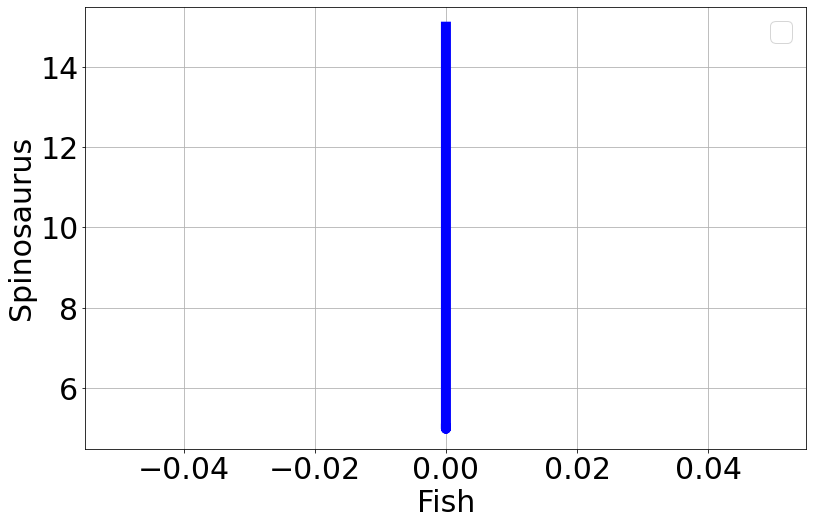

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


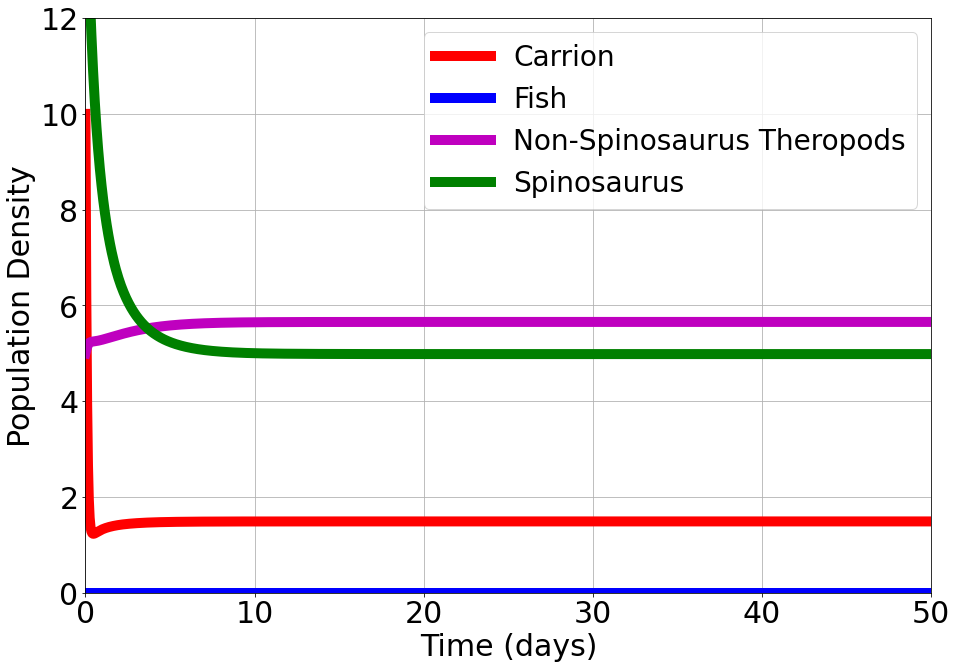

In [30]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50]) #time_list[-1]
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/No_density_mediated_evolution_free_F.eps', format='eps')
plt.tight_layout()
plt.show()

# Absence of Fishes and Sauropods and others 

## Exponential Density-Mediated Interaction

## Parameter values

In [31]:
lambda_T=0.1
lambda_S=0.01
alpha=1
beta=100
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 0, 5, 15])

In [32]:
def model_exponential_density_mediated(
    t,
    X,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = lambda_T * np.exp( - alpha * S )
    aST = lambda_S * np.exp ( - beta * T )
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = 0#r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(lambda_T,lambda_S,alpha,beta,p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [33]:
solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,lambda_T=lambda_T, lambda_S=lambda_S, alpha=alpha, beta=beta, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_exponential_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


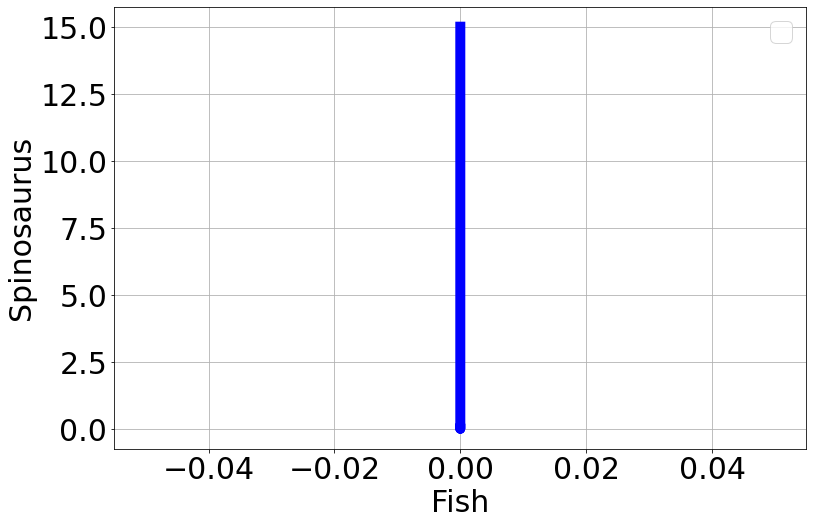

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


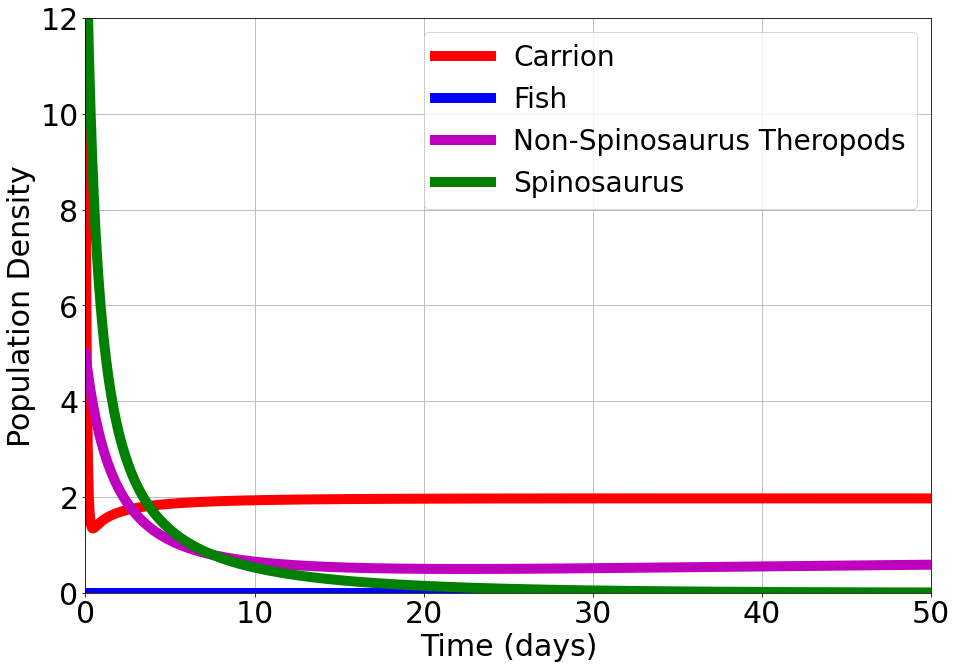

In [35]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50]) #time_list[-1]
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/exponential_density_mediated_evolution_free_FO.eps', format='eps')
plt.tight_layout()
plt.show()

## No density-mediated interaction

In [36]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = 0#r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [37]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_No_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


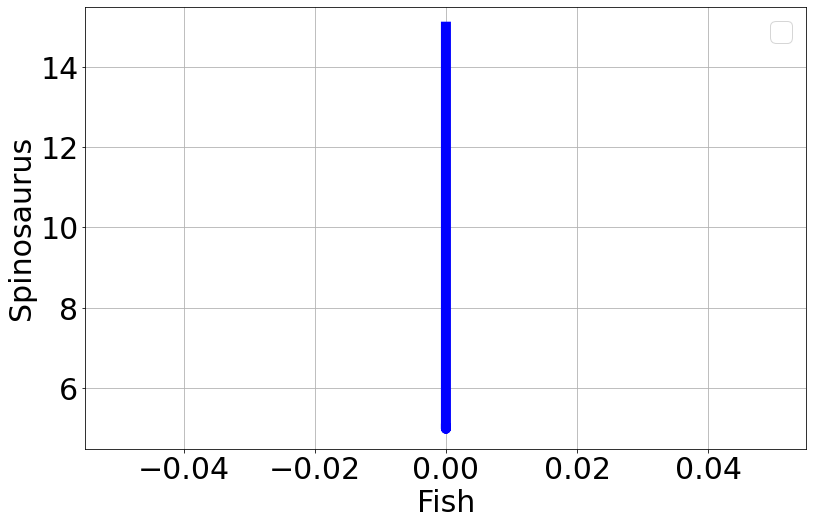

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


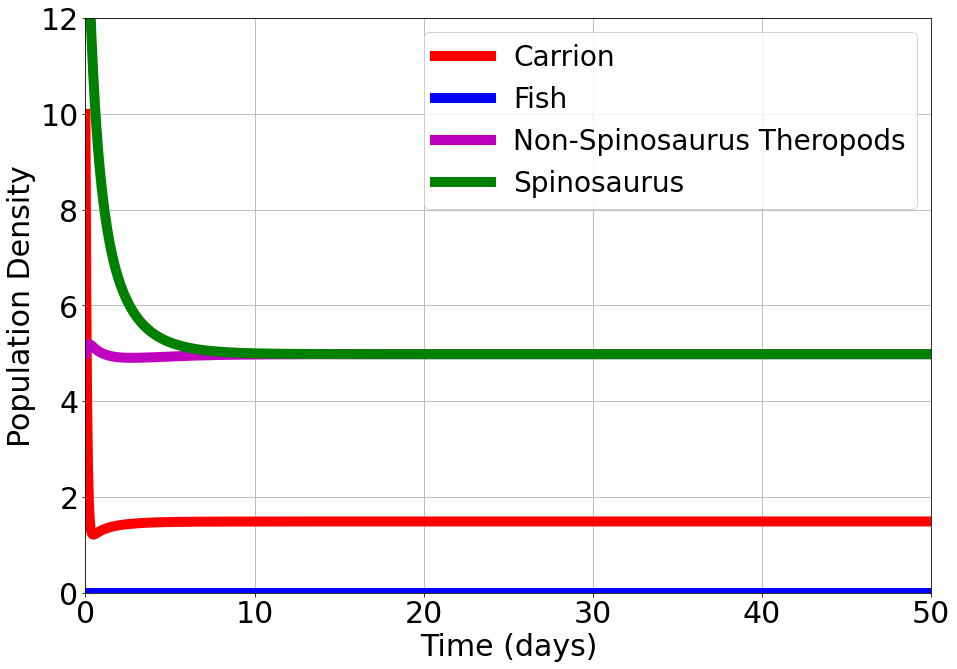

In [39]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50]) #time_list[-1]
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/No_density_mediated_evolution_free_FO.eps', format='eps')
plt.tight_layout()
plt.show()

# Addition of the Crocodylomorpha functional group 

\begin{align}
\dfrac{dC}{dt}&= p - dC - \left(\dfrac{a_SCS}{1+a_Sh_SC+a_Sh_SF}\right) - \left(\dfrac{a_TCT}{1+a_Th_TC+a_Th_TO}\right) \\
\dfrac{dF}{dt}&= r_FF\left(1-\dfrac{F}{K_F}\right) - \left(\dfrac{a_SFS}{1+a_Sh_SC+a_Sh_SF}\right) - \left(\dfrac{a_RFR}{1+a_Rh_RF}\right) \\
\dfrac{dT}{dt}&= \left(\dfrac{a_T(S)CT + a_TOT}{1+a_T(S)h_TC+a_Th_TO}\right) - m_TT - q_TT^2 \\
\dfrac{dS}{dt}&= \left(\dfrac{a_S(T)CS + a_SFS}{1+a_S(T)h_SC+a_Sh_SF}\right) - m_SS - q_SS^2 \\
\dfrac{dR}{dt}&= \left(\dfrac{a_RFR}{1+a_Rh_RF}\right) - m_RR - q_RR^2
\end{align}

with $a_T(S)$ and $a_S(T)$ either

\begin{align*}
a_T(S)=\lambda_T\exp{(-\alpha S)} \\
a_S(T)=\lambda_S\exp{(-\beta T)}
\end{align*}

or

\begin{align*}
a_T(S)=a_T \\
a_S(T)=a_S
\end{align*}

# Exponential Density-Mediated Interaction

## Parameter values

In [40]:
lambda_T=0.1
lambda_S=0.01
alpha=1
beta=100
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1
a_R=1
h_R=1
m_R=0.1
q_R=0.1

y0 = np.array([10, 10, 5, 15, 5])

In [41]:
def model_exponential_density_mediated(
    t,
    X,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
    a_R=a_R,
    h_R=h_R,
    m_R=m_R,
    q_R=q_R,
):
    C, F, T, S, R = X
    aTS = lambda_T * np.exp( - alpha * S )
    aST = lambda_S * np.exp ( - beta * T )
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_R * F * R / ( 1 + a_R * h_R * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    R_prime = ( a_R * F * R ) / ( 1 + a_R * h_R * F ) - m_R * R - q_R * R**2
    return C_prime, F_prime, T_prime, S_prime, R_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
    a_R=a_R,
    h_R=h_R,
    m_R=m_R,
    q_R=q_R,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(lambda_T,lambda_S,alpha,beta,p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S,a_R,h_R,m_R,q_R),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [42]:
solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,lambda_T=lambda_T, lambda_S=lambda_S, alpha=alpha, beta=beta, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S, a_R=a_R, h_R=h_R, m_R=m_R, q_R=q_R)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus, Crocodylomorpha = y_computed_exponential_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


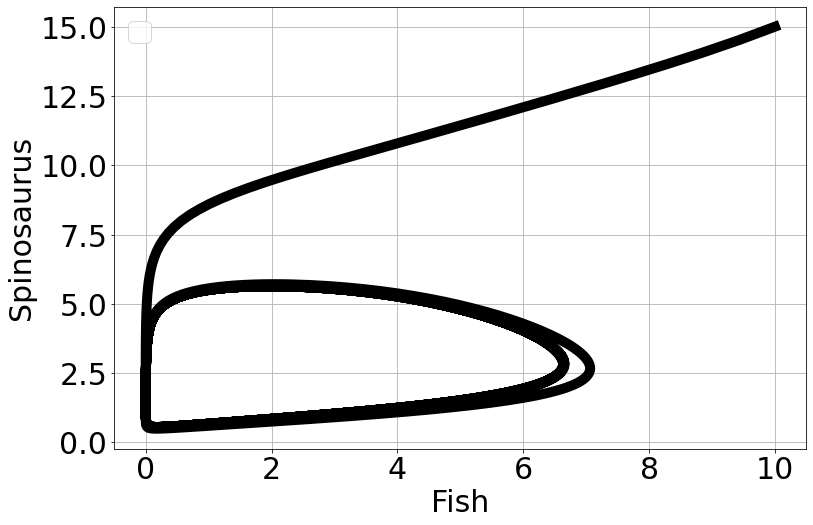

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="k")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/exponential_density_mediated_crocodylomorpha_phase_plane_spinosaurus.eps', format='eps')

plt.tight_layout()
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


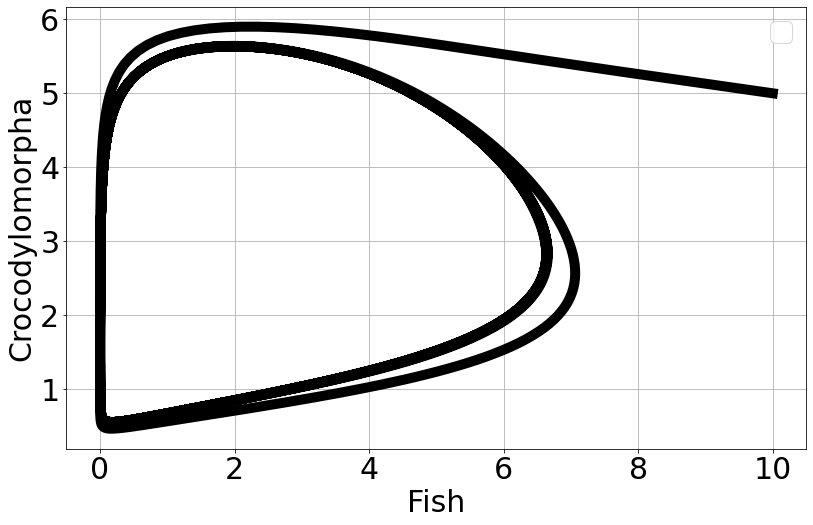

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Crocodylomorpha, linestyle="-", linewidth=10, markersize=12,color="k")

plt.xlabel("Fish")
plt.ylabel("Crocodylomorpha")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/exponential_density_mediated_crocodylomorpha_phase_plane_crocodylomorpha.eps', format='eps')

plt.tight_layout()
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


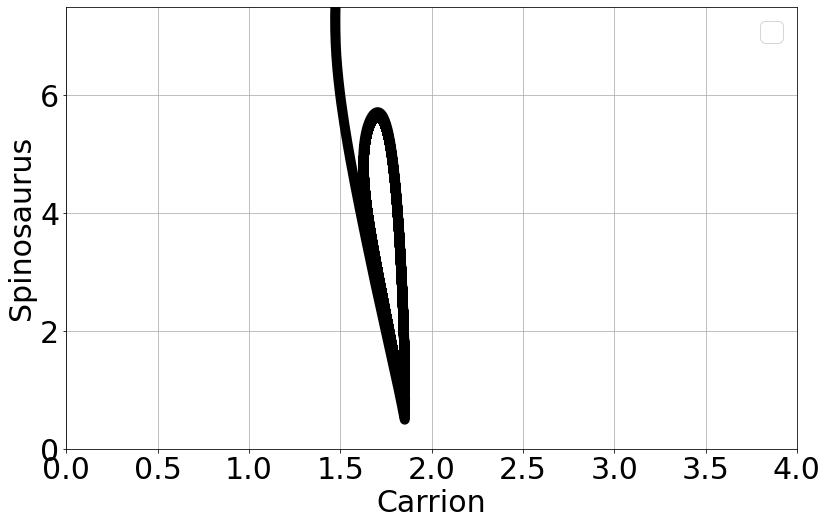

In [45]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Carrion, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="k")

plt.xlabel("Carrion")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})
plt.xlim([0, 4])
plt.ylim([0, 7.5])

plt.savefig('img/exponential_density_mediated_crocodylomorpha_phase_plane_carrion.eps', format='eps')

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


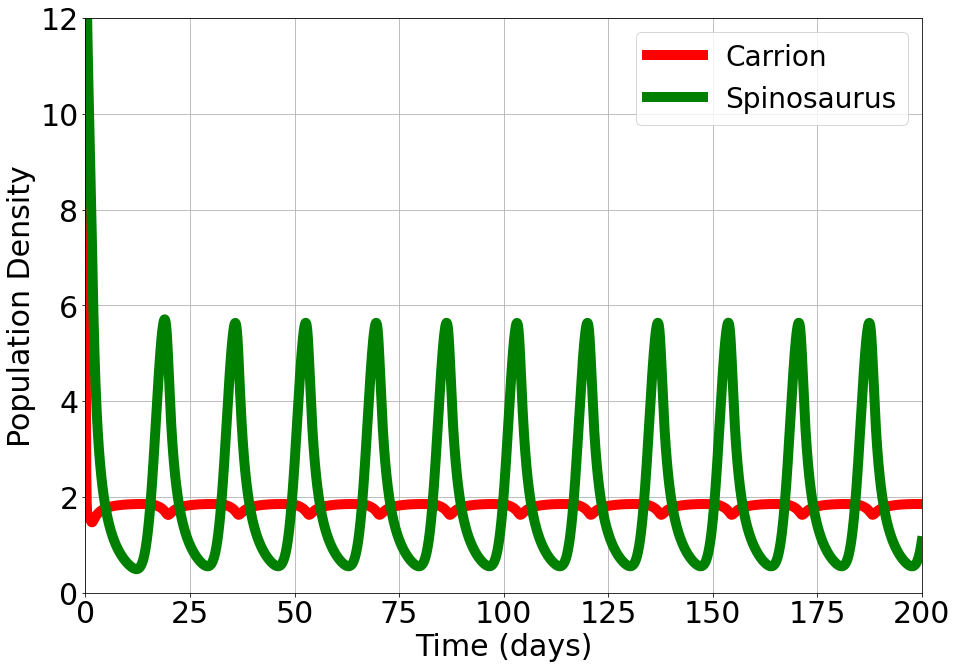

In [46]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
#ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
#ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")
#ax.plot(time_list, Crocodylomorpha, label="Crocodylomorpha", linestyle="-", linewidth=10, markersize=12,color="y")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/exponential_density_mediated_crocodylomorpha_evolution.eps', format='eps')
plt.tight_layout()
plt.show()

# No density-mediated interaction

## Parameter values

In [47]:
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1
a_R=1
h_R=1
m_R=0.1
q_R=0.1

y0 = np.array([10, 10, 5, 15, 5])

In [48]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
    a_R=a_R,
    h_R=h_R,
    m_R=m_R,
    q_R=q_R,
):
    C, F, T, S, R = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_R * F * R / ( 1 + a_R * h_R * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    R_prime = ( a_R * F * R ) / ( 1 + a_R * h_R * F ) - m_R * R - q_R * R**2
    return C_prime, F_prime, T_prime, S_prime, R_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
    a_R=a_R,
    h_R=h_R,
    m_R=m_R,
    q_R=q_R,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S,a_R,h_R,m_R,q_R),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [49]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S, a_R=a_R, h_R=h_R, m_R=m_R, q_R=q_R)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus, Crocodylomorpha = y_computed_No_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


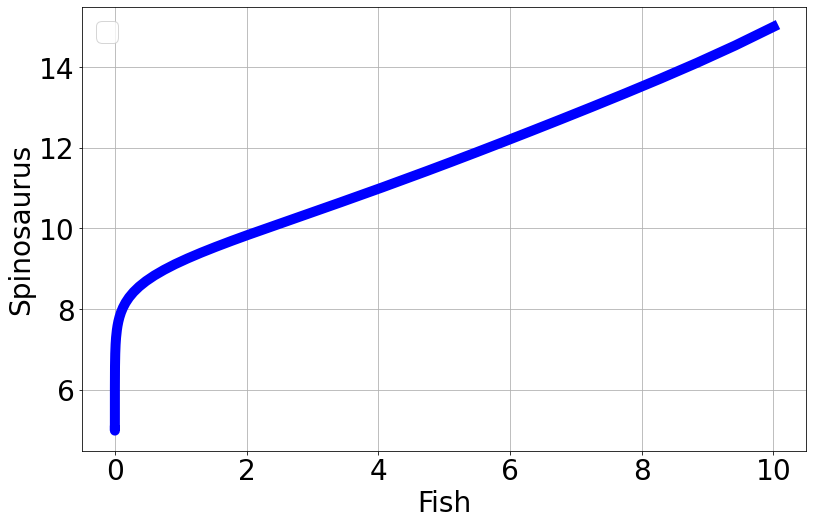

In [50]:
plt.rcParams['lines.linewidth'] = 30
plt.rcParams.update({'font.size': 28})

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


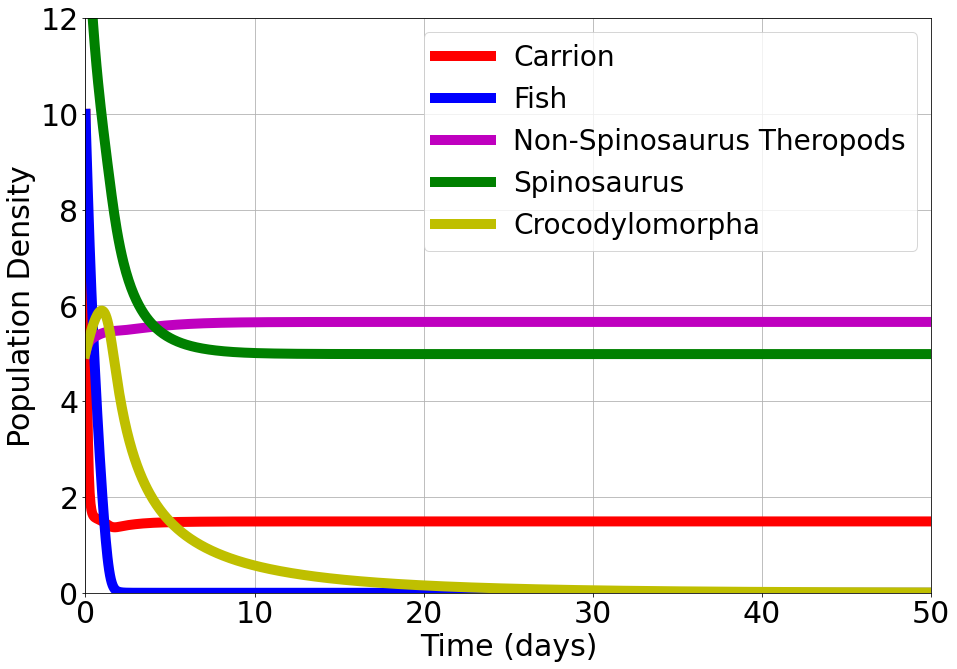

In [51]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")
ax.plot(time_list, Crocodylomorpha, label="Crocodylomorpha", linestyle="-", linewidth=10, markersize=12,color="y")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50]) #time_list[-1]
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/No_density_mediated_crocodylomorpha_evolution.eps', format='eps')
plt.tight_layout()
plt.show()